# Guided Project #15: Predicting Car Prices

In this guided project, we will practice the machine learning workflow to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). 

Let's first read in the data set

In [1]:
import pandas as pd
import numpy as np

col_names = ['symboling', 'normalized_losses','make', 'fuel_type', 'aspiration', 'num_doors',
             'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
             'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size',
             'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
             'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv('imports-85.data', names=col_names)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

### Analyzing and cleaning data

Our target column is price.

For numerical features we can use:
- symboling
- normalized_losses if we're able to clean ?s
- wheel_base
- length
- width
- height
- curb_weight
- engine_size
- bore
- stroke
- compression_ratio
- horsepower
- peak_rpm
- city_mpg
- highway_mpg

Based on the data set preview from the last step, we can tell that the normalized_losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns.

In [3]:
cars.replace('?',np.nan, inplace=True)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

Bore, stroke, horsepower and peak_rpm have only several missing values. Let's replace them with averages and convert to numeric types. Although horsepower could be converted to int, float is good enough for us as well, as we will be normalizing data going forward anyway.

normalized_losses seems to have too many missing values. We will not use that column as a feature

In [5]:
num_features = ['bore', 'stroke', 'horsepower', 'peak_rpm']
for feature in num_features:
    mean = cars[feature].astype(float).mean()
    cars[feature].fillna(mean, inplace=True)
    cars[feature] = cars[feature].astype(float)

In [6]:
cars[num_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
bore          205 non-null float64
stroke        205 non-null float64
horsepower    205 non-null float64
peak_rpm      205 non-null float64
dtypes: float64(4)
memory usage: 6.5 KB


Since price column is our target, let's discard the rows with no price

In [7]:
cars.drop(index=cars[cars['price'].isna()].index, inplace=True)
cars['price'] = cars['price'].astype(float)

#### Normalizing the dataset

In [8]:
features = ['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
            'engine_size', 'bore', 'stroke', 'compression_ratio', 
            'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']

target = 'price'

ncars = cars[features].copy()
ncars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
symboling            201 non-null int64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
engine_size          201 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null int64
highway_mpg          201 non-null int64
dtypes: float64(9), int64(5)
memory usage: 23.6 KB


In [9]:
ncars = (ncars-ncars.min())/(ncars.max()-ncars.min())
ncars['price'] = cars['price']
ncars.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### Univariative prediction
Let's start with some univariate k-nearest neighbors models.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

def knn_train_test(feature,target,df):
    test_size = round(len(df)*0.25)
    test_df = df.sample(test_size, random_state=1)
    train_df = df.drop(index=test_df.index)
    
    knn = KNeighborsRegressor()
    knn.fit(train_df[[feature]], train_df[target])
    
    predictions = knn.predict(test_df[[feature]])
    mse = mean_squared_error(predictions, test_df[target])
    
    return sqrt(mse)
    
rmses = {}

for feature in features:
    rmses[feature] = knn_train_test(feature, target, ncars)
    
rmses

{'symboling': 7458.819988067817,
 'wheel_base': 4967.046841897104,
 'length': 3941.577088019464,
 'width': 3933.2479300445834,
 'height': 7120.2450024138925,
 'curb_weight': 3891.844139839108,
 'engine_size': 3407.8075172168983,
 'bore': 5691.564242279973,
 'stroke': 7227.301572122198,
 'compression_ratio': 6989.120570601139,
 'horsepower': 3019.140337115848,
 'peak_rpm': 7118.329562699384,
 'city_mpg': 3483.1457919530153,
 'highway_mpg': 3668.607735040638}

With default k value horsepower seems to perform best with the lowest rmse of 3019

Let's try different k values for all of the features above. We will redefine knn_train_test to accept k as an argument

In [11]:
def knn_train_test(feature, target, df, k):
    test_size = round(len(df)*0.25)
    test_df = df.sample(test_size, random_state=1)
    train_df = df.drop(index=test_df.index)
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[feature]], train_df[target])
    
    predictions = knn.predict(test_df[[feature]])
    mse = mean_squared_error(predictions, test_df[target])
    
    return sqrt(mse)
    
rmses = {}

for k in [1,3,5,7,9]:
    rmses_k = {}
    for feature in features:
        rmses_k[feature] = knn_train_test(feature, target, ncars, k)
    rmses[k] = rmses_k

rmses

{1: {'symboling': 7018.701302947718,
  'wheel_base': 3562.48560418144,
  'length': 4217.992100514177,
  'width': 4636.202655190991,
  'height': 8321.000840043222,
  'curb_weight': 5116.12947451489,
  'engine_size': 4256.2712977440715,
  'bore': 11381.061859070973,
  'stroke': 9423.623922886567,
  'compression_ratio': 6496.007847901664,
  'horsepower': 3254.4727990874344,
  'peak_rpm': 7939.181223526769,
  'city_mpg': 3983.561672674342,
  'highway_mpg': 6579.023956484731},
 3: {'symboling': 8139.017121113445,
  'wheel_base': 4329.065835335225,
  'length': 4748.577864067421,
  'width': 3930.73826031588,
  'height': 6324.662227081116,
  'curb_weight': 4067.4978751616386,
  'engine_size': 3321.093238009971,
  'bore': 5952.668612572945,
  'stroke': 7898.891139900587,
  'compression_ratio': 5802.319154537357,
  'horsepower': 3190.22328650798,
  'peak_rpm': 8867.731352493714,
  'city_mpg': 3676.840839029554,
  'highway_mpg': 3991.042905473873},
 5: {'symboling': 7458.819988067817,
  'wheel_ba

In [12]:
rmse_df = pd.DataFrame(rmses)
rmse_df

,1,3,5,7,9
bore,11381.061859,5952.668613,5691.564242,5933.130725,6230.196243
city_mpg,3983.561673,3676.840839,3483.145792,3715.682497,3867.362113
compression_ratio,6496.007848,5802.319155,6989.120571,6583.574326,6187.055860
curb_weight,5116.129475,4067.497875,3891.844140,3621.337939,3321.486826
engine_size,4256.271298,3321.093238,3407.807517,3677.452397,3457.602684
height,8321.000840,6324.662227,7120.245002,7255.510285,7761.984873
highway_mpg,6579.023956,3991.042905,3668.607735,3856.528006,3756.791433
horsepower,3254.472799,3190.223287,3019.140337,3161.010556,3672.763405
length,4217.992101,4748.577864,3941.577088,4124.299597,4203.106402
peak_rpm,7939.181224,8867.731352,7118.329563,7346.266725,7459.811139


In [36]:
rmse_df.describe()

,1,3,5,7,9
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,6156.122611,5302.883551,5136.985594,5170.989907,5190.967611
std,2441.705475,1893.857283,1713.772859,1650.877737,1670.591445
min,3254.472799,3190.223287,3019.140337,3161.010556,3321.486826
25%,4227.561900,3945.814422,3724.416836,3717.500926,3693.770412
50%,5806.068661,4538.821850,4454.311965,4592.003645,4703.918688
75%,7709.061243,6231.663823,7086.027315,6875.280068,6733.451957
max,11381.061859,8867.731352,7458.819988,7363.886430,7761.984873


In [30]:
rmse_df['feature'] = rmse_df.index
melted_df = rmse_df.melt(id_vars='feature', value_vars=[1,3,5,7,9])
melted_df.rename(columns={'variable':'k','value':'rmse'}, inplace=True)
melted_df['k'] = melted_df['k'].astype(int)
melted_df.head()


,feature,k,rmse
0,bore,1,11381.061859
1,city_mpg,1,3983.561673
2,compression_ratio,1,6496.007848
3,curb_weight,1,5116.129475
4,engine_size,1,4256.271298


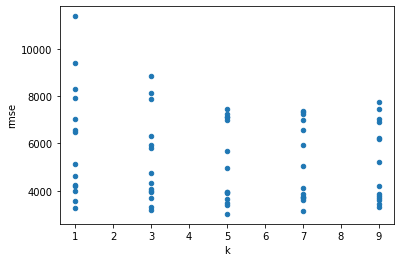

In [35]:
melted_df.plot(kind='scatter', x='k', y='rmse')

### Multivariative prediction
Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns. We'll use default k value for now

In [43]:
def knn_train_test(features, target, df):
    test_size = round(len(df)*0.25)
    test_df = df.sample(test_size, random_state=1)
    train_df = df.drop(index=test_df.index)
    
    knn = KNeighborsRegressor()
    knn.fit(train_df[features], train_df[target])
    
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(predictions, test_df[target])
    
    return sqrt(mse)

Let's use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.

In [47]:
rmse_df[5].sort_values()[:2]

horsepower     3019.140337
engine_size    3407.807517
Name: 5, dtype: float64

In [45]:
best_2 = ['horsepower','engine_size']
rmse = knn_train_test(best_2, 'price', ncars)
print('RMSE with best 2 features: {}'.format(rmse))

RMSE with best 2 features: 3050.9865976762335


Let's now use the best 3, 4, and 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.

In [48]:
num_features = [2, 3, 4, 5]
for n in num_features:
    features = list(rmse_df[5].sort_values()[:n].index)
    rmse = knn_train_test(features, 'price', ncars)
    print('RMSE with best {} features: {}'.format(n, rmse))

RMSE with best 2 features: 3050.9865976762335
RMSE with best 3 features: 2923.2950326643395
RMSE with best 4 features: 2815.136094614255
RMSE with best 5 features: 3157.6414044663147


Let's now optimize the top 3 models, by varying the hyperparameter value from 1 to 25. We will plot the resulting RMSE values.

In [54]:
def knn_train_test(features, target, df, k):
    test_size = round(len(df)*0.25)
    test_df = df.sample(test_size, random_state=1)
    train_df = df.drop(index=test_df.index)
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[features], train_df[target])
    
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(predictions, test_df[target])
    
    return sqrt(mse)

nk_rmses = {}

for k in range(1,26):
    for n in range(2,5):
        features = list(rmse_df[5].sort_values()[:n].index)
        rmse = knn_train_test(features, 'price', ncars, k)
        index = str(k)+'_'+str(n)
        nk_rmses[index] = {
            'n':n,
            'k':k,
            'rmse':rmse
        }

nk_df = pd.DataFrame(nk_rmses).transpose()
nk_df.head()

,k,n,rmse
1_2,1.0,2.0,3253.731590
1_3,1.0,3.0,3116.191499
1_4,1.0,4.0,2875.483594
2_2,2.0,2.0,2981.648787
2_3,2.0,3.0,2770.888989


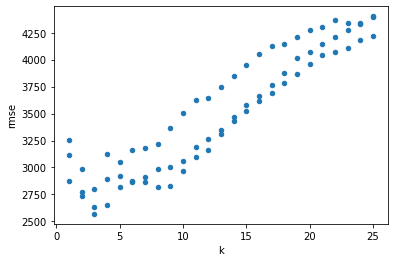

In [55]:
nk_df.plot(kind='scatter', x='k', y='rmse')

The best performing k value seems to be k=3. Let's take a closer look at that

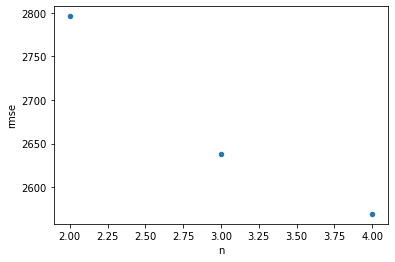

In [59]:
nk_df[nk_df['k']==3].plot(kind='scatter', x='n', y='rmse')

So the best n value is n=4. The best KNN prediction model would be the one with k=3, using the following top 4 features:

In [64]:
list(rmse_df[5].sort_values()[:4].index)

['horsepower', 'engine_size', 'city_mpg', 'highway_mpg']

Which also makes sence! As these features look important enough to affect the car's price

### To-Do
That's it for the guided steps. Here are some ideas for next steps:

- Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
- Modify the knn_train_test() function to perform the data cleaning as well.

Curious to see what other students have done on this project? Head over to our [Community](https://community.dataquest.io/tags/c/social/share/49/155) to check them out. While you are there, please remember to show some love and give your own feedback!

And of course, we welcome you to share your own project and show off your hard work. Head over to our Community to share your finished Guided Project!